In [0]:
# Import the machine learning libraries.
import numpy as np
import keras as K
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [52]:
%%time
max_words = 20000

# Load the IMDB review sentiment dataset.
# Split the dataset into the training set and test subsets.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)
CPU times: user 4.4 s, sys: 259 ms, total: 4.66 s
Wall time: 4.67 s


In [53]:
max_review_length = 100
X_train = K.preprocessing.sequence.pad_sequences(X_train, truncating='pre', padding='pre', maxlen=max_review_length)
X_test = K.preprocessing.sequence.pad_sequences(X_test, truncating='pre', padding='pre', maxlen=max_review_length)

print(X_train.shape, X_test.shape)

(25000, 100) (25000, 100)


In [54]:
# Build the model.
lstm_input = Input(shape=(100,))
embedding = Embedding(max_words, 128, input_length=100)(lstm_input)
simple_lstm = LSTM(128)(embedding)
dropout = Dropout(0.4)(simple_lstm)
dense = Dense(1)(dropout)
activation = Activation('sigmoid')(dense)
model = Model(lstm_input, activation)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________

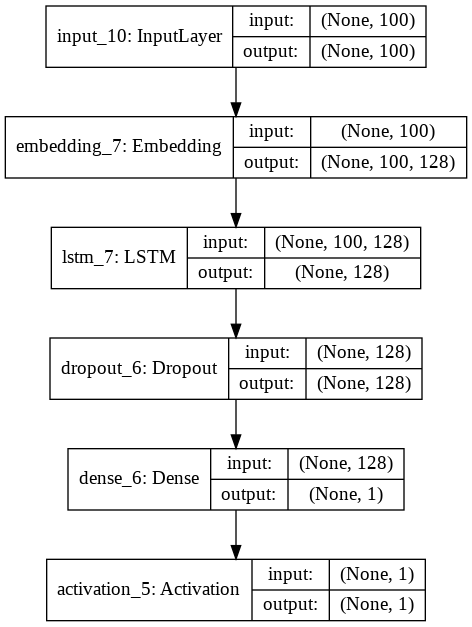

In [55]:
# Visualize.
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [56]:
# Train the model.
%%time
batch_size = 32
model.fit(X_train, y_train, batch_size = batch_size, epochs=10, validation_data = (X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 156s 6ms/step - loss: 0.4250 - accuracy: 0.8036 - val_loss: 0.3508 - val_accuracy: 0.8488
Epoch 2/10
25000/25000 [==============================] - 155s 6ms/step - loss: 0.2454 - accuracy: 0.9034 - val_loss: 0.3763 - val_accuracy: 0.8466
Epoch 3/10
25000/25000 [==============================] - 152s 6ms/step - loss: 0.1501 - accuracy: 0.9441 - val_loss: 0.4942 - val_accuracy: 0.8295
Epoch 4/10
25000/25000 [==============================] - 160s 6ms/step - loss: 0.1009 - accuracy: 0.9634 - val_loss: 0.5348 - val_accuracy: 0.8308
Epoch 5/10
25000/25000 [==============================] - 157s 6ms/step - loss: 0.0660 - accuracy: 0.9782 - val_loss: 0.6371 - val_accuracy: 0.8328
Epoch 6/10
25000/25000 [==============================] - 159s 6ms/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.6665 - val_accuracy: 0.8265
Epoch 7/10
25000/25000 [==============================] - 158s

In [57]:
# Evaluate the model.
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 25s 1ms/step
Test score: 0.9267370243781805
Test accuracy: 0.8256400227546692


In [63]:
review = "The movie was a great waste of time."
print(f'New review: {review}')

New review: The movie was a great waste of time.


In [64]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=max_review_length)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

review = [2, 20, 16, 6, 87, 437, 7, 2]
Prediction (0 = Negative, 1 = positive) = [[0.27584174]]


In [65]:
review = "It was a great movie"
print(f'New review: {review}')

New review: It was a great movie


In [66]:
d = imdb.get_word_index()
words = review.split()
review = []
for word in words:
    if word not in d:
        review.append(2)
    else:
        review.append(d[word] + 3)
print(f'review = {review}')
review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=max_review_length)
prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

review = [2, 16, 6, 87, 20]
Prediction (0 = Negative, 1 = positive) = [[0.93220365]]
